# Square Test
## Configuration

In [1]:
using PyPlot: matplotlib
import PyPlot as plt

const PatchCollection = matplotlib.collections.PatchCollection
plt.svg(true)

include("src/PolyColoid.jl")
using .PolyColoid

## Plotting Object Constructor

In [2]:
function get_patch(square)
    θ = acos(square.normals[1])
    side_angle = θ + π/4
    side_shift = √2 * square.bisector * [cos(side_angle), sin(side_angle)]
    return matplotlib.patches.Rectangle(square.center .- side_shift, 2square.bisector,
        2square.bisector, angle=rad2deg(θ), fc="mediumblue", ec="red")
end

get_patch (generic function with 1 method)

## Constructor

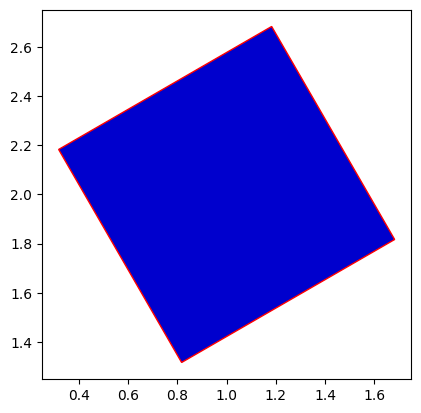

In [3]:
fig, ax = plt.subplots()
square = RegEvenPoly(4, 1/√2, π/6, (1.0, 2.0))
ax.add_patch(get_patch(square))
ax.autoscale()
ax.set_aspect("equal")
display(fig)
plt.close()

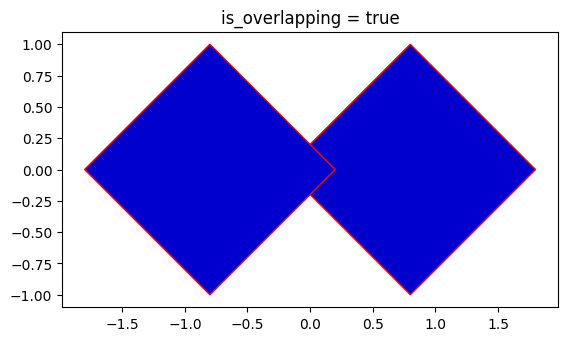

2×4 StaticArrays.MMatrix{2, 4, Float32, 8} with indices SOneTo(2)×SOneTo(4):
 0.8  -0.2          0.8  1.8
 1.0  -5.96244f-9  -1.0  3.31804f-7

In [4]:
fig, ax = plt.subplots()

square1 = RegEvenPoly(4, 1.0, π/4, (0.8, 0))
square2 = RegEvenPoly(4, 1.0, π/4, (-0.8, 0))
ax.add_patch(get_patch(square1))
ax.add_patch(get_patch(square2))
ax.set_title("is_overlapping = $(is_overlapping(square1, square2))")

ax.autoscale()
ax.set_aspect("equal")
display(fig)
plt.close()
display(square1.vertices)

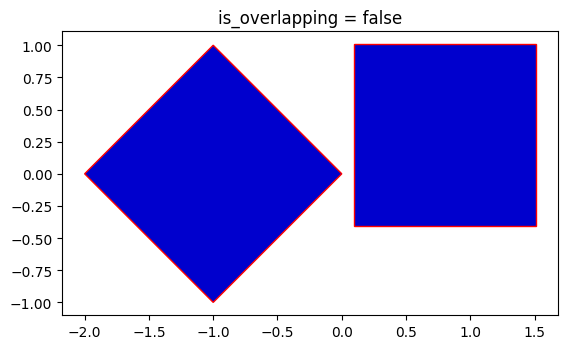

In [5]:
fig, ax = plt.subplots()

square1 = RegEvenPoly(4, 1.0, 0.0, (0.8, 0.3))
square2 = RegEvenPoly(4, 1.0, π/4, (-1.0, 0))
ax.add_patch(get_patch(square1))
ax.add_patch(get_patch(square2))
ax.set_title("is_overlapping = $(is_overlapping(square1, square2))")

ax.autoscale()
ax.set_aspect("equal")
display(fig)
plt.close()

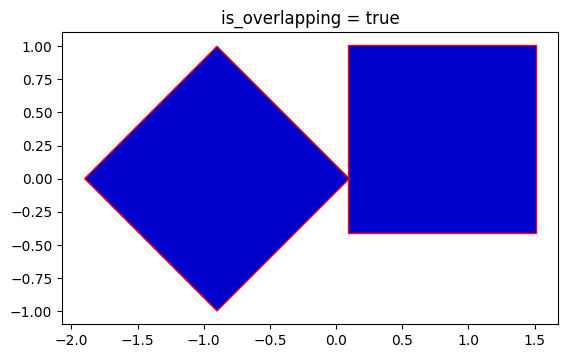

In [6]:
fig, ax = plt.subplots()

square1 = RegEvenPoly(4, 1.0, 0.0, (0.8, 0.3))
square2 = RegEvenPoly(4, 1.0, π/4, (-0.9, 0))
ax.add_patch(get_patch(square1))
ax.add_patch(get_patch(square2))
ax.set_title("is_overlapping = $(is_overlapping(square1, square2))")

ax.autoscale()
ax.set_aspect("equal")
display(fig)
plt.close()

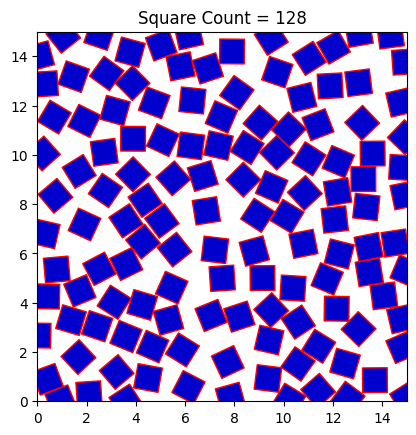

In [7]:
fig, ax = plt.subplots()
xlen, ylen = 15.0, 15.0

squares = RegEvenPoly[]
for _ in 1:100000
    new_square = RegEvenPoly(4, 1 / √2, π/2 * rand(), (xlen*rand(), ylen*rand()))
    flag = true
    for square in squares
        if is_overlapping(square, new_square)
            flag = false
            break
        end
    end
    if flag
        push!(squares, new_square)
    end
end

ax.add_collection(PatchCollection([get_patch(square) for square in squares], match_original=true))
ax.set_title("Square Count = $(length(squares))")

ax.set_xlim(0.0, xlen)
ax.set_ylim(0.0, ylen)
ax.set_aspect("equal")
# plt.savefig("rnddist_square.pdf", bbox_inches="tight")
# plt.savefig("rnddist_square.png", bbox_inches="tight")
display(fig)
plt.close()